In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob
from scipy.optimize import curve_fit
import re
import math

In [2]:
dr = '/Users/litz/Documents/GitHub/data/model_KIC9773821/'
files = glob.glob(dr + "*set*.csv")
temp = []
for filename in files:
    df0 = pd.read_csv(filename, index_col=0)
    temp.append(df0)
data = pd.concat(temp, axis = 0, ignore_index=True)
data.head()

,evol_stage,star_mass,star_age,effective_T,log_g,radius,luminosity,star_feh,delta_nu,nu_max,...,lk_nu_max,lk_delta_nu,lk_delta_nu_fit,lk_delta_Pg,lk_total,lk_l0,surf_a,surf_b,lk_global,lk_new
0,2,2.398709,-0.321440,5136.996250,2.942843,8.659877,46.918354,0.001475,8.787713,105.150747,...,0.025329,0.346906,0.485001,0.041307,0.037875,0.570153,-0.517208,1.750607,0.729070,0.023630
1,3,2.393330,-0.290084,5142.365934,2.896475,9.124485,52.305935,0.010950,8.168601,94.453343,...,0.020242,0.490633,0.417435,0.692208,0.463253,0.100309,-0.230741,-6.423777,0.773624,0.073923
2,2,2.798683,-0.379700,5173.576144,2.962454,9.145223,53.831229,0.200370,8.744957,109.618161,...,0.024264,0.362030,0.486449,0.459316,0.103259,0.661176,-0.453440,0.860713,0.186044,0.077753
3,3,2.105674,-0.137140,5304.538227,2.919633,8.333426,49.399189,-0.389104,8.842746,98.091862,...,0.023007,0.327025,0.488262,0.994609,0.012632,0.846709,-0.182970,4.910870,0.011044,0.012799
4,3,2.514830,-0.276478,5246.255903,2.947675,8.817820,52.917910,-0.187070,8.783846,105.214178,...,0.025327,0.348287,0.488948,0.304155,0.079843,0.933040,-0.186733,2.160413,0.207056,0.080864


,evol_stage,star_mass,star_age,effective_T,log_g,radius,luminosity,star_feh,delta_nu,nu_max,...,lk_nu_max,lk_delta_nu,lk_delta_nu_fit,lk_delta_Pg,lk_total,lk_l0,surf_a,surf_b,lk_global,lk_new
0,2,2.398709,-0.321440,5136.996250,2.942843,8.659877,46.918354,0.001475,8.787713,105.150747,...,0.025329,0.346906,0.485001,0.041307,0.037875,0.570153,-0.517208,1.750607,0.729070,0.023630
1,3,2.393330,-0.290084,5142.365934,2.896475,9.124485,52.305935,0.010950,8.168601,94.453343,...,0.020242,0.490633,0.417435,0.692208,0.463253,0.100309,-0.230741,-6.423777,0.773624,0.073923
2,2,2.798683,-0.379700,5173.576144,2.962454,9.145223,53.831229,0.200370,8.744957,109.618161,...,0.024264,0.362030,0.486449,0.459316,0.103259,0.661176,-0.453440,0.860713,0.186044,0.077753
3,3,2.105674,-0.137140,5304.538227,2.919633,8.333426,49.399189,-0.389104,8.842746,98.091862,...,0.023007,0.327025,0.488262,0.994609,0.012632,0.846709,-0.182970,4.910870,0.011044,0.012799
4,3,2.514830,-0.276478,5246.255903,2.947675,8.817820,52.917910,-0.187070,8.783846,105.214178,...,0.025327,0.348287,0.488948,0.304155,0.079843,0.933040,-0.186733,2.160413,0.207056,0.080864


Tanda: we still use the same modes

In [3]:
nu_0_n_number = [i for i in range(1,41)]
nu_0_n_text = ['nu_0_%s' % s for s in nu_0_n_number]
E_0_n_text = ['E_0_%s' % s for s in nu_0_n_number]
nu_1_n_number = [i for i in range(-1000,41)]
nu_1_n_text = ['nu_1_%s' % s for s in nu_1_n_number]
E_1_n_text = ['E_1_%s' % s for s in nu_1_n_number]
nu_2_n_number = [i for i in range(-1000,41)]
nu_2_n_text = ['nu_2_%s' % s for s in nu_2_n_number]
E_2_n_text = ['E_2_%s' % s for s in nu_2_n_number]
output_freq_header = nu_0_n_text # + nu_1_n_text + nu_2_n_text
output_E_hearder = E_0_n_text  # + E_1_n_text + E_2_n_text


sub_df_name = ['evol_stage','star_mass','star_age','effective_T','log_g','radius','luminosity','star_feh',
               'delta_nu','nu_max','delta_nu_fit','delta_Pg'] + output_freq_header #+ output_E_hearder
sub_df = data[sub_df_name]
#sub_df['star_age'] = np.log10(sub_df['star_age'])
sub_df = sub_df.loc[( (sub_df['evol_stage'] >= 1) )] #(sub_df['star_age'] > 6.0)& 
sub_df.tail()

,evol_stage,star_mass,star_age,effective_T,log_g,radius,luminosity,star_feh,delta_nu,nu_max,...,nu_0_31,nu_0_32,nu_0_33,nu_0_34,nu_0_35,nu_0_36,nu_0_37,nu_0_38,nu_0_39,nu_0_40
2042,3,2.232144,-0.173665,4978.921582,2.931406,8.464531,39.557539,0.010582,8.794750,104.030713,...,260.623212,268.924454,277.118818,285.218284,293.240443,301.220945,309.232204,317.342172,325.574556,333.875518
2043,3,2.232132,-0.173508,4981.671813,2.935678,8.422973,39.256682,0.010582,8.860482,105.030248,...,262.600307,270.969608,279.232875,287.402273,295.490510,303.533407,311.599862,319.764897,328.048734,336.408451
2044,2,2.678654,-0.450134,5308.328562,2.955852,9.015229,57.978511,0.000047,8.797932,106.585252,...,261.262112,269.668351,278.014649,286.282087,294.465876,302.551356,310.575256,318.584096,326.652934,334.803289
2045,3,2.434838,-0.152977,5072.654671,2.947045,8.682745,44.847440,0.211725,8.780486,106.844254,...,260.623251,268.936696,277.173090,285.320774,293.378652,301.382856,309.371228,317.431825,325.587905,333.864750
2046,3,2.425444,-0.040042,5141.168330,2.937166,8.765108,48.221880,0.211725,8.771083,103.742985,...,259.831793,268.079223,276.224631,284.278155,292.248607,300.209822,308.224602,316.336718,324.556280,332.866723


,evol_stage,star_mass,star_age,effective_T,log_g,radius,luminosity,star_feh,delta_nu,nu_max,...,nu_0_31,nu_0_32,nu_0_33,nu_0_34,nu_0_35,nu_0_36,nu_0_37,nu_0_38,nu_0_39,nu_0_40
2042,3,2.232144,-0.173665,4978.921582,2.931406,8.464531,39.557539,0.010582,8.794750,104.030713,...,260.623212,268.924454,277.118818,285.218284,293.240443,301.220945,309.232204,317.342172,325.574556,333.875518
2043,3,2.232132,-0.173508,4981.671813,2.935678,8.422973,39.256682,0.010582,8.860482,105.030248,...,262.600307,270.969608,279.232875,287.402273,295.490510,303.533407,311.599862,319.764897,328.048734,336.408451
2044,2,2.678654,-0.450134,5308.328562,2.955852,9.015229,57.978511,0.000047,8.797932,106.585252,...,261.262112,269.668351,278.014649,286.282087,294.465876,302.551356,310.575256,318.584096,326.652934,334.803289
2045,3,2.434838,-0.152977,5072.654671,2.947045,8.682745,44.847440,0.211725,8.780486,106.844254,...,260.623251,268.936696,277.173090,285.320774,293.378652,301.382856,309.371228,317.431825,325.587905,333.864750
2046,3,2.425444,-0.040042,5141.168330,2.937166,8.765108,48.221880,0.211725,8.771083,103.742985,...,259.831793,268.079223,276.224631,284.278155,292.248607,300.209822,308.224602,316.336718,324.556280,332.866723


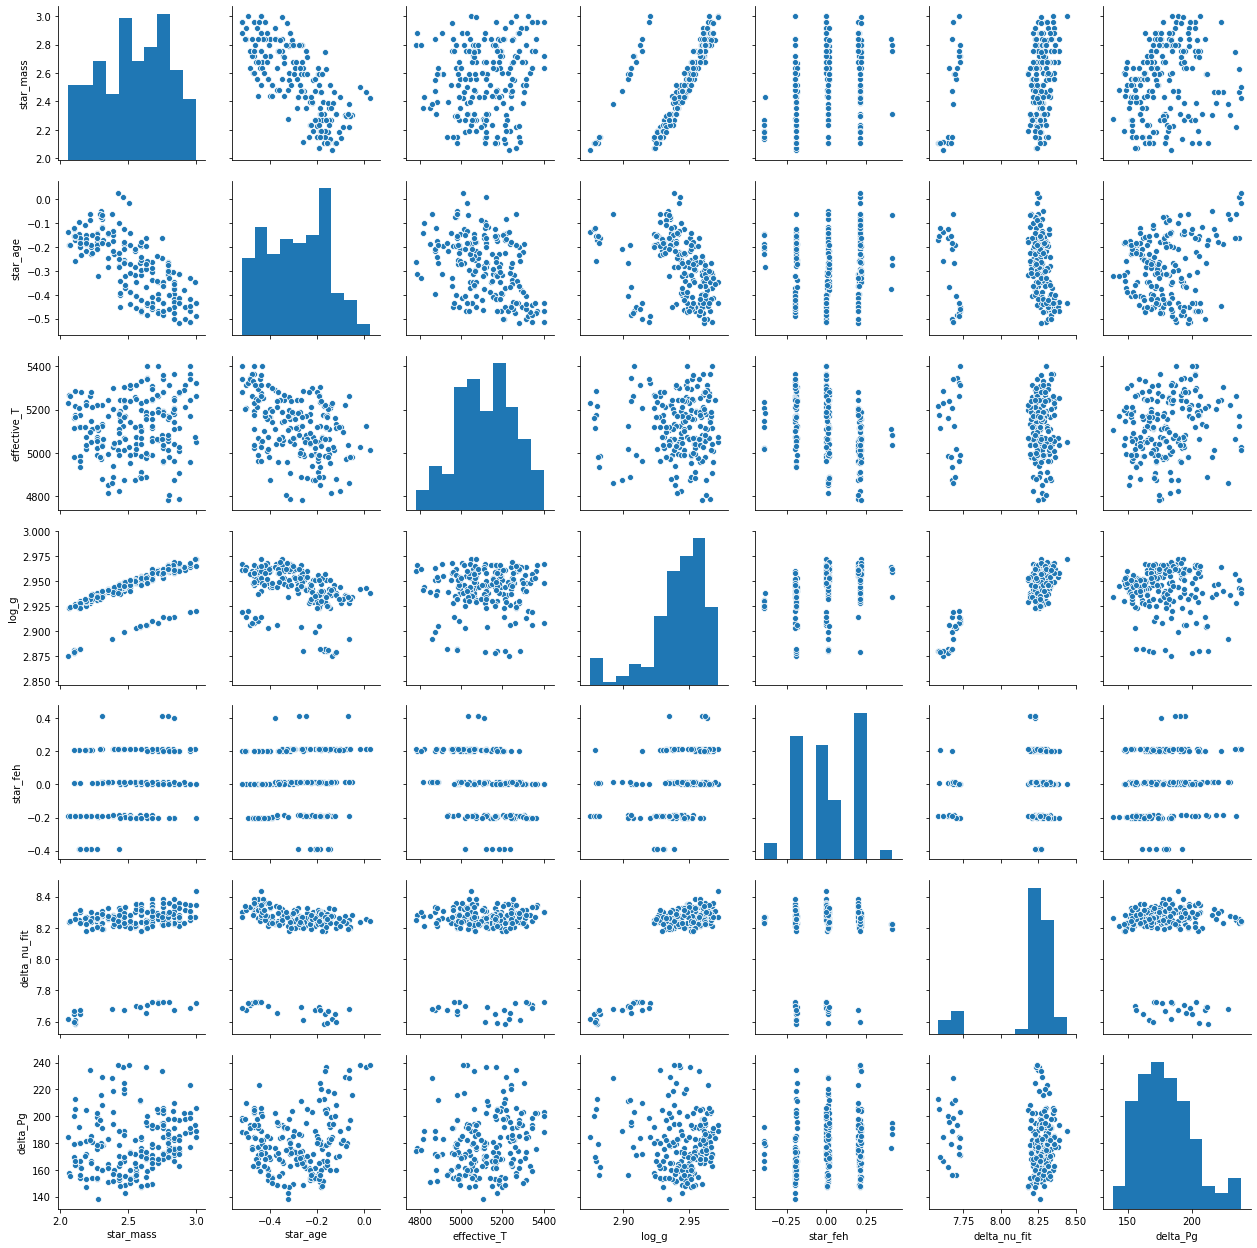

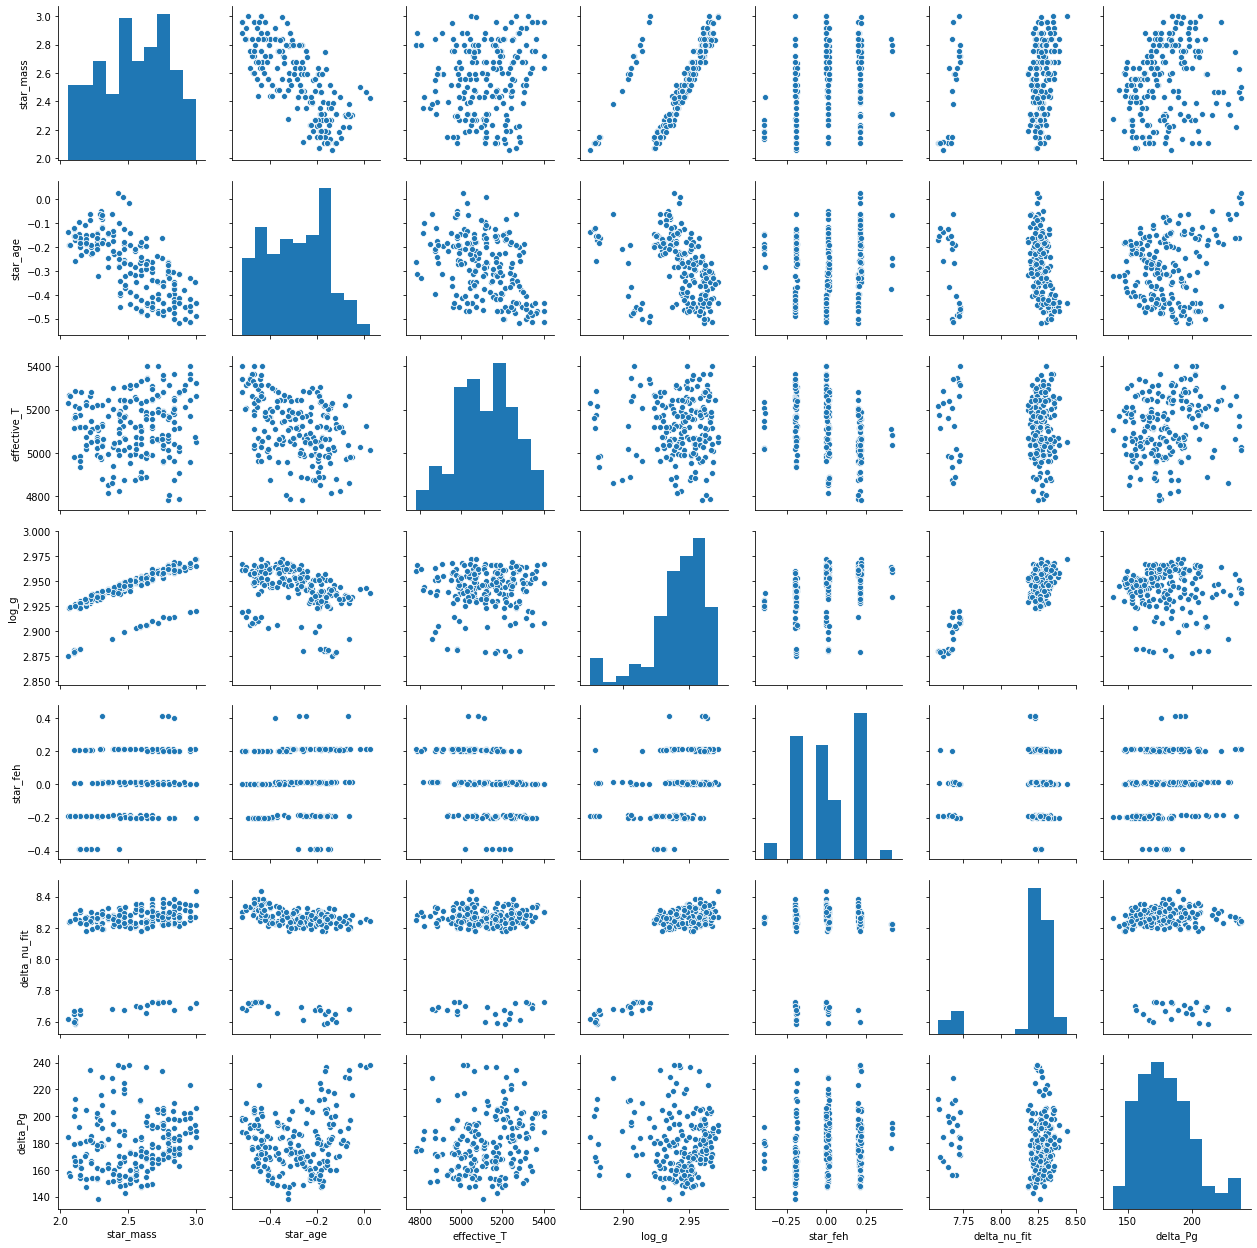

In [4]:
sub_df.isna().sum()
sub_df = sub_df.dropna()
plotset = sub_df.sample(frac = 0.1, random_state=1)
sns.pairplot(plotset[['star_mass','star_age','effective_T','log_g','star_feh',
                      'delta_nu_fit','delta_Pg']])

[ 8.10990476 74.30183333]
0.0013729111517348784 0.024025945575800074
[ 8.10990476 74.30183333]
0.0013729111517348784 0.024025945575800074


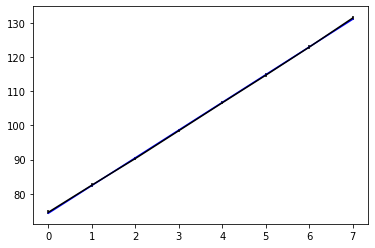

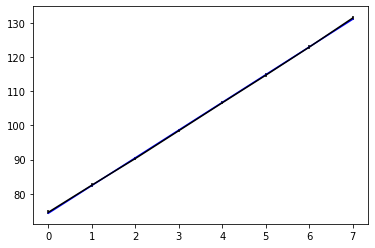

In [5]:
#set up a star KIC 9773821
#[Fe/H] = -0.03 +/- -0.15
#Teff (K) = 5080 +/- 130
#logg = 2.70 +/- 0.33

obs_teff = 5080.0
obs_teff_e = 130.0
obs_logg = 2.70
obs_logg_e = 0.33
obs_feh = -0.03
obs_feh_e = 0.15

obs_nu0 = np.array([74.587,82.508,90.302,98.454,106.613,114.687,122.910,131.431])
obs_n0 = np.array([0,1,2,3,4,5,6,7])
obs_nu0_e = np.array([0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5])

def line(x, a, b):
    return a * x + b

popt, pcov = curve_fit(line, obs_n0, obs_nu0, sigma = obs_nu0_e)

print(popt)
print(pcov[0,0], pcov[1,1])

fig, ax = plt.subplots()
ax.errorbar(obs_n0, obs_nu0, c = 'k', yerr = obs_nu0_e )
ax.plot(obs_n0, (popt[1] + popt[0]*obs_n0), c = 'b')

obs_delta_nu = popt[0]
obs_delta_nu_e = 0.10*obs_delta_nu
obs_nu_max = 105.0
obs_nu_max_e = 0.15*obs_nu_max
obs_delta_Pg = 194.0
obs_delta_Pg_e = 20.0


In [6]:
def mle(model, obs, obs_e):
    lk = 1.0/ (2.0*3.14159*obs_e**2.0)**(0.5) * np.exp( 0.0 - (model - obs)**2.0/2.0/obs_e**2.0 )
    return lk

In [7]:
def prob(para, lk, start, end, binsize,shift):
    n = int((end - start + shift)/binsize)
    x = np.zeros(n)
    y = np.zeros(n)
    for i in range(n):
        x[i] = start + shift + i*binsize + 0.5*binsize
        yindex = np.where((para >= (start + shift + i*binsize)) &
                          (para < (start + shift + (i+1)*binsize))
                         )
        yyy = yindex[0]
        if (len(yyy) > 0):
            y[i] = np.sum(lk[yyy])
    return x, y

# fit with RGB Models

Text(0, 0.5, 'log_g')

Text(0, 0.5, 'log_g')

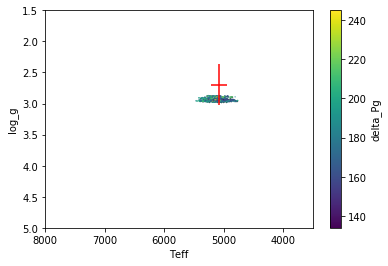

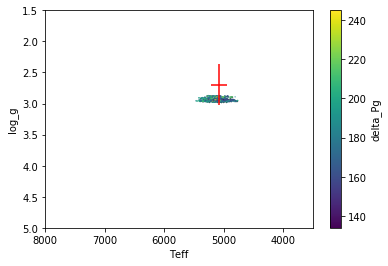

In [8]:
starset = sub_df.loc[( ((sub_df['effective_T'] - obs_teff).abs() < 10*obs_teff_e) &  
                       ((sub_df['log_g'] - obs_logg).abs() < 5*obs_logg_e) &
                       (sub_df['evol_stage'] >= 2) & 
                       (sub_df['delta_nu_fit'] > 0.0) &
                       (sub_df['delta_Pg'] < 500.0)                     
                     )]

fig, ax = plt.subplots()
ax.scatter(plotset['effective_T'],plotset['log_g'], c = 'k', s = 0.1)
s = ax.scatter(starset['effective_T'],starset['log_g'], c = starset['delta_Pg'], s = 0.1)
ax.errorbar(obs_teff, obs_logg, xerr = obs_teff_e, yerr = obs_logg_e, c = 'r')
plt.colorbar(s,ax=ax).set_label('delta_Pg')
ax.set_xlim([8000,3500])
ax.set_ylim([5.0,1.5])
ax.set_xlabel("Teff")
ax.set_ylabel("log_g")

In [9]:
starset['lk_effective_T'] = mle(starset['effective_T'], obs = obs_teff, obs_e = obs_teff_e)
starset['lk_log_g'] = mle(starset['log_g'], obs = obs_logg, obs_e = obs_logg_e)
starset['lk_feh'] = mle(starset['star_feh'], obs = obs_feh, obs_e = obs_feh_e)
starset['lk_nu_max'] =  mle(starset['nu_max'], obs = obs_nu_max, obs_e = obs_nu_max_e)
starset['lk_delta_nu'] = mle(starset['delta_nu'], obs = obs_delta_nu, obs_e = obs_delta_nu_e)
starset['lk_delta_nu_fit'] = mle(starset['delta_nu_fit'], obs = obs_delta_nu, obs_e = obs_delta_nu_e)
starset['lk_delta_Pg'] = mle(starset['delta_Pg'], obs = obs_delta_Pg, obs_e = obs_delta_Pg_e)


starset['lk_total'] = starset['lk_effective_T']*starset['lk_log_g']*starset['lk_feh']*starset['lk_nu_max']*starset['lk_delta_nu_fit']*starset['lk_delta_Pg']
starset['lk_total'] = starset['lk_total']/np.max(starset['lk_total'])

In [10]:
#histx, histy = prob(starset['star_mass'], starset['lk_total'], 0.7, 3.0, 0.04, 0.0)
#fig, ax = plt.subplots()
#ax.plot(histx, histy)
#ax.set_xlim(0.7,3.0)

Text(0.5, 1.0, 'Models for KIC KIC 9773821')

Text(0.5, 1.0, 'Models for KIC KIC 9773821')

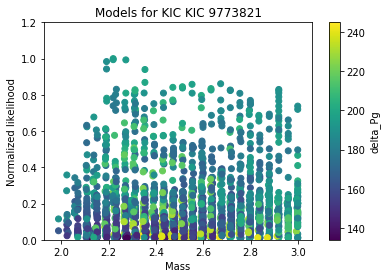

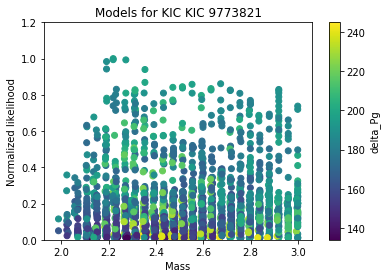

In [11]:
fig, ax = plt.subplots()
s = ax.scatter(starset['star_mass'],starset['lk_total'], c = starset['delta_Pg'])
ax.set_ylim([1.5,3.5])
ax.set_ylim([0.000,1.2])
plt.xlabel('Mass')
plt.ylabel('Normalized likelihood')
plt.colorbar(s,ax=ax).set_label('delta_Pg')
plt.title('Models for KIC KIC 9773821')

#Fit radial modes 

In [12]:
starset_seismo = starset.loc[(starset['lk_total'] >= 0.01)]
starset_seismo['lk_l0'] = starset_seismo['star_mass']*0.00
starset_seismo['surf_a'] = starset_seismo['star_mass']*0.00 + 9999.0
starset_seismo['surf_b'] = starset_seismo['star_mass']*0.00 + 9999.0
starset_seismo

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,evol_stage,star_mass,star_age,effective_T,log_g,radius,luminosity,star_feh,delta_nu,nu_max,...,lk_log_g,lk_feh,lk_nu_max,lk_delta_nu,lk_delta_nu_fit,lk_delta_Pg,lk_total,lk_l0,surf_a,surf_b
0,2,2.398709,-0.321440,5136.996250,2.942843,8.659877,46.918354,0.001475,8.787713,105.150747,...,0.922155,2.601704,0.025329,0.346906,0.485001,0.000824,0.037875,0.0,9999.0,9999.0
1,3,2.393330,-0.290084,5142.365934,2.896475,9.124485,52.305935,0.010950,8.168601,94.453343,...,1.012564,2.562331,0.020242,0.490633,0.417435,0.013808,0.463253,0.0,9999.0,9999.0
2,2,2.798683,-0.379700,5173.576144,2.962454,9.145223,53.831229,0.200370,8.744957,109.618161,...,0.881139,0.817779,0.024264,0.362030,0.486449,0.009162,0.103259,0.0,9999.0,9999.0
3,3,2.105674,-0.137140,5304.538227,2.919633,8.333426,49.399189,-0.389104,8.842746,98.091862,...,0.968742,0.151450,0.023007,0.327025,0.488262,0.019840,0.012632,0.0,9999.0,9999.0
4,3,2.514830,-0.276478,5246.255903,2.947675,8.817820,52.917910,-0.187070,8.783846,105.214178,...,0.912174,1.537163,0.025327,0.348287,0.488948,0.006067,0.079843,0.0,9999.0,9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042,3,2.232144,-0.173665,4978.921582,2.931406,8.464531,39.557539,0.010582,8.794750,104.030713,...,0.945410,2.564042,0.025282,0.344386,0.486386,0.003186,0.120512,0.0,9999.0,9999.0
2043,3,2.232132,-0.173508,4981.671813,2.935678,8.422973,39.256682,0.010582,8.860482,105.030248,...,0.936786,2.564042,0.025330,0.320549,0.479396,0.002501,0.094105,0.0,9999.0,9999.0
2044,2,2.678654,-0.450134,5308.328562,2.955852,9.015229,57.978511,0.000047,8.797932,106.585252,...,0.895092,2.606790,0.025202,0.343244,0.483157,0.008907,0.092924,0.0,9999.0,9999.0
2045,3,2.434838,-0.152977,5072.654671,2.947045,8.682745,44.847440,0.211725,8.780486,106.844254,...,0.913481,0.725943,0.025157,0.349485,0.487574,0.008475,0.118170,0.0,9999.0,9999.0


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,evol_stage,star_mass,star_age,effective_T,log_g,radius,luminosity,star_feh,delta_nu,nu_max,...,lk_log_g,lk_feh,lk_nu_max,lk_delta_nu,lk_delta_nu_fit,lk_delta_Pg,lk_total,lk_l0,surf_a,surf_b
0,2,2.398709,-0.321440,5136.996250,2.942843,8.659877,46.918354,0.001475,8.787713,105.150747,...,0.922155,2.601704,0.025329,0.346906,0.485001,0.000824,0.037875,0.0,9999.0,9999.0
1,3,2.393330,-0.290084,5142.365934,2.896475,9.124485,52.305935,0.010950,8.168601,94.453343,...,1.012564,2.562331,0.020242,0.490633,0.417435,0.013808,0.463253,0.0,9999.0,9999.0
2,2,2.798683,-0.379700,5173.576144,2.962454,9.145223,53.831229,0.200370,8.744957,109.618161,...,0.881139,0.817779,0.024264,0.362030,0.486449,0.009162,0.103259,0.0,9999.0,9999.0
3,3,2.105674,-0.137140,5304.538227,2.919633,8.333426,49.399189,-0.389104,8.842746,98.091862,...,0.968742,0.151450,0.023007,0.327025,0.488262,0.019840,0.012632,0.0,9999.0,9999.0
4,3,2.514830,-0.276478,5246.255903,2.947675,8.817820,52.917910,-0.187070,8.783846,105.214178,...,0.912174,1.537163,0.025327,0.348287,0.488948,0.006067,0.079843,0.0,9999.0,9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042,3,2.232144,-0.173665,4978.921582,2.931406,8.464531,39.557539,0.010582,8.794750,104.030713,...,0.945410,2.564042,0.025282,0.344386,0.486386,0.003186,0.120512,0.0,9999.0,9999.0
2043,3,2.232132,-0.173508,4981.671813,2.935678,8.422973,39.256682,0.010582,8.860482,105.030248,...,0.936786,2.564042,0.025330,0.320549,0.479396,0.002501,0.094105,0.0,9999.0,9999.0
2044,2,2.678654,-0.450134,5308.328562,2.955852,9.015229,57.978511,0.000047,8.797932,106.585252,...,0.895092,2.606790,0.025202,0.343244,0.483157,0.008907,0.092924,0.0,9999.0,9999.0
2045,3,2.434838,-0.152977,5072.654671,2.947045,8.682745,44.847440,0.211725,8.780486,106.844254,...,0.913481,0.725943,0.025157,0.349485,0.487574,0.008475,0.118170,0.0,9999.0,9999.0


In [13]:
def kb95(X, a, b):
    x1, x2 = X
    return x1 - a*x2**b

def surface_correction(obs_freq, mode_freq, nu_max, sc_method):
    if (sc_method == 'kb95'):
        #kb 95 nu_obs - nu_model = a*(nu_obs/nu_max)**b        
        popt, pcov = curve_fit(kb95, (obs_freq, obs_freq/nu_max), mode_freq)
        a, b = popt
        a_e, b_e = pcov
    return a, b

def correct_sc(obs_freq, mode_freq, nu_max, sc_method, a, b):
    if (sc_method == 'kb95'):
        new_mode_freq = mode_freq + a*(obs_freq/nu_max)**b
    return new_mode_freq

def seismo_lk(obs_freq,obs_freq_e,mode_freq, n):
    chi2 = np.sum(1.0/n*((obs_freq - mode_freq)**2.0/2.0/obs_freq_e**2.0))
    lk = math.exp(0.0 - chi2)
    return lk


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  


Text(0, 0.5, '$\\nu_{\\rm obs}$ - $\\nu_{\\rm mod}$')

Text(0, 0.5, '$\\nu_{\\rm obs}$ - $\\nu_{\\rm mod}$')

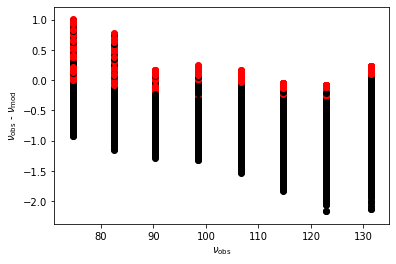

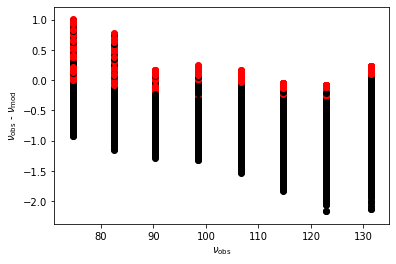

In [14]:
#
all_freq = obs_nu0
all_freq_e = obs_nu0_e
all_model_n = obs_n0
all_nu_max = obs_nu_max
all_delta_nu = obs_delta_nu
#
column_l_prefix = 'nu_0_'
marking_mode = obs_nu0[0]
marking_mode_n = 0
fairfit_marking_mode = 2.0
fig, ax = plt.subplots()
for index, row in starset_seismo.iterrows():
    marking_index = (row[output_freq_header]- marking_mode).abs().argmin()     
    marking_abs_min = (row[output_freq_header]- marking_mode).abs().min()
    #
    if (marking_abs_min<= fairfit_marking_mode ):
        n_start = re.findall('\d+', marking_index)
        n_for_fit = all_model_n + int(n_start[1]) - marking_mode_n
        column_for_fit = [column_l_prefix + '%s' % s for s in n_for_fit]
        #surface correction
        surf_a, surf_b = surface_correction(all_freq, row[column_for_fit].to_numpy(), all_nu_max, 'kb95')
        #
        if ((surf_a <= 0.0) & (surf_b >=0.0)):
            new_mode_freq = correct_sc(all_freq, row[column_for_fit].to_numpy(), all_nu_max, 'kb95', surf_a, surf_b)
            xxx = seismo_lk(all_freq,all_freq_e,row[column_for_fit].to_numpy(), len(all_freq))
            starset_seismo.at[index,'lk_l0'] = xxx
            starset_seismo.at[index,'surf_a'] = surf_a
            starset_seismo.at[index,'surf_b'] = surf_b
            #print(row['lk_l0'],surf_a)
            plt.scatter(all_freq , all_freq -  row[column_for_fit].to_numpy(), c ='k')
            plt.scatter(all_freq , all_freq -  new_mode_freq, c = 'r')
plt.xlabel(r'$\nu_{\rm obs}$')
plt.ylabel(r'$\nu_{\rm obs}$ - $\nu_{\rm mod}$')


0.008148277182593958
0.9893143725654673
0.008148277182593958
0.9893143725654673


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

Text(0.5, 1.0, 'Models for KIC 9773821')

Text(0.5, 1.0, 'Models for KIC 9773821')

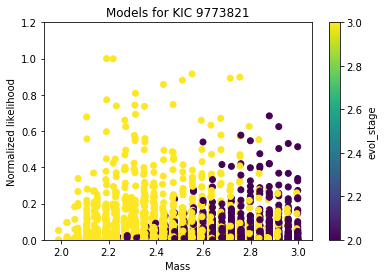

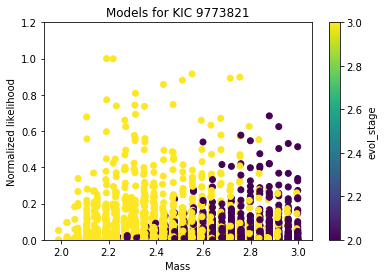

In [15]:
starset_seismo['lk_global'] = starset_seismo['lk_effective_T']*starset_seismo['lk_log_g']*starset_seismo['lk_feh']
print(np.max(starset_seismo['lk_global']))
starset_seismo['lk_global'] = starset_seismo['lk_global']/np.max(starset_seismo['lk_global'])

starset_seismo['lk_delta_Pg'] = starset_seismo['lk_delta_Pg']/np.max(starset_seismo['lk_delta_Pg'])

print(np.max(starset_seismo['lk_l0']))
starset_seismo['lk_l0'] = starset_seismo['lk_l0']/np.max(starset_seismo['lk_l0'])

starset_seismo['lk_new']  = starset_seismo['lk_global']*starset_seismo['lk_l0']*starset_seismo['lk_delta_Pg']

starset_seismo['lk_new'] = starset_seismo['lk_new']/np.max(starset_seismo['lk_new'])

fig, ax = plt.subplots()
s = ax.scatter(starset_seismo['star_mass'],starset_seismo['lk_new'], c = starset_seismo['evol_stage'])
ax.set_ylim([1.5,3.5])
ax.set_ylim([0.000, 1.2])
plt.xlabel('Mass')
plt.ylabel('Normalized likelihood')
plt.colorbar(s,ax=ax).set_label('evol_stage')
plt.title('Models for KIC 9773821')

In [16]:
def gaus(x):
    return a*math.exp(-(x-mu)**2/(2*sigma**2))

7.138438528831297
7.138438528831297


//anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
//anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


Text(0, 0.5, 'Normalized likelihood')

Text(0, 0.5, 'Normalized likelihood')

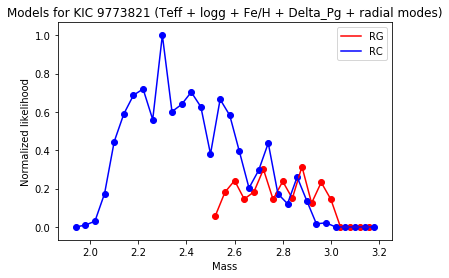

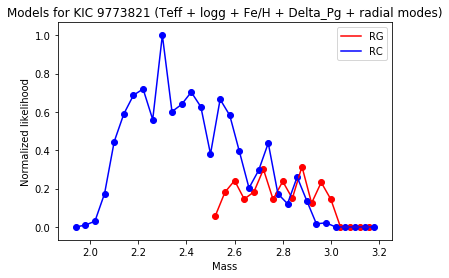

In [17]:
rg_set = starset_seismo.loc[( (starset_seismo['evol_stage'] == 2) )]
rc_set = starset_seismo.loc[( (starset_seismo['evol_stage'] == 3) )]

px1, py1 = prob(rg_set['star_mass'], rg_set['lk_new'], 2.5, 3.2, 0.04, 0.0)
px2, py2 = prob(rc_set['star_mass'], rc_set['lk_new'], 1.92, 3.2, 0.04, 0.0)

py_max = np.max( np.concatenate((py1, py2), axis = 0) )
print(py_max)

plt.plot(px1, py1/py_max, c = 'r',label='RG')
plt.scatter(px1,py1/py_max, c = 'r')

plt.plot(px2, py2/py_max, c = 'b',label='RC')
plt.scatter(px2,py2/py_max, c = 'b')

plt.legend()

plt.title(r'Models for KIC 9773821 (Teff + logg + Fe/H + Delta_Pg + radial modes)')
plt.xlabel('Mass')
plt.ylabel('Normalized likelihood')
#popt,pcov = curve_fit(gaus,px,py)
#plt.plot(px,'ro:',label='fit')


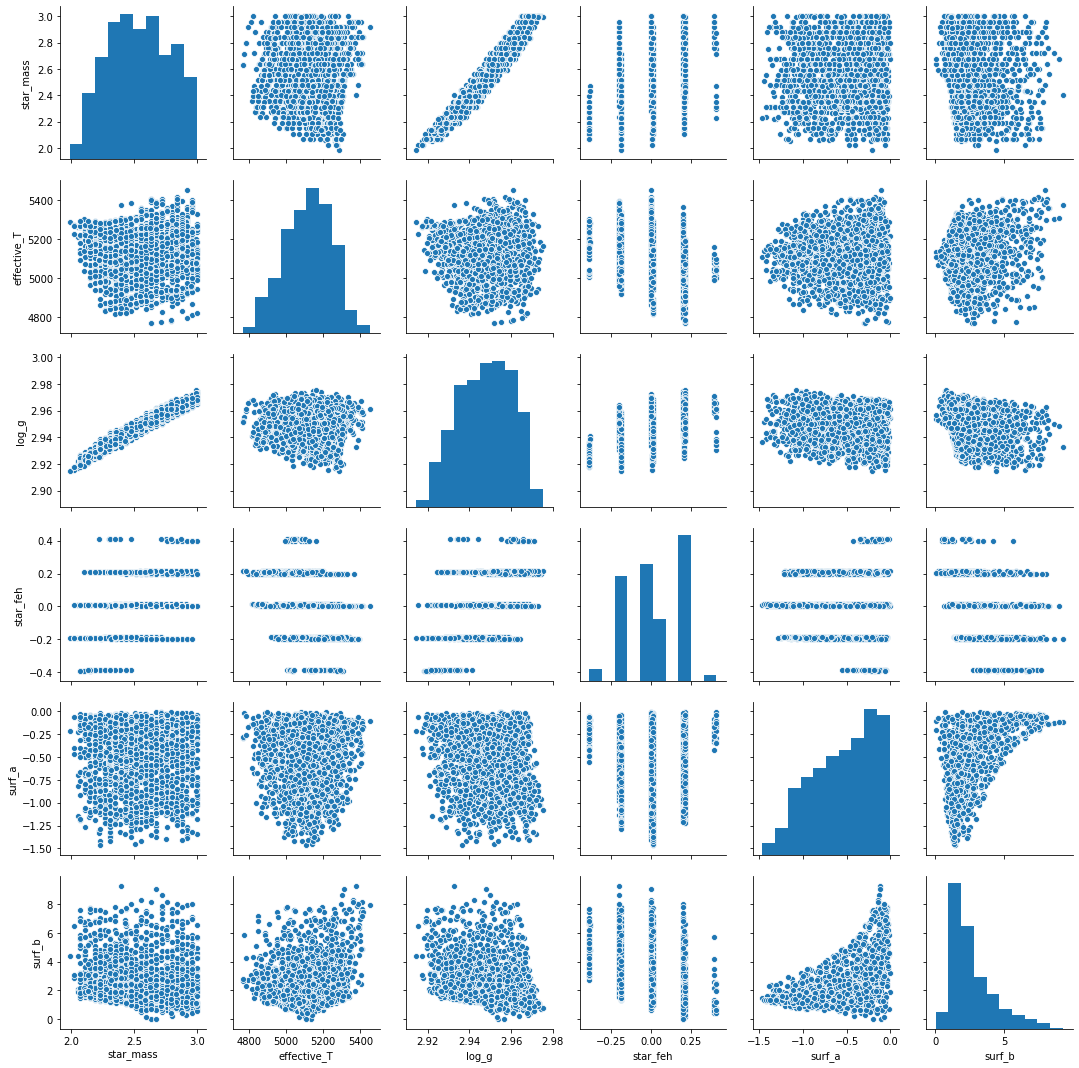

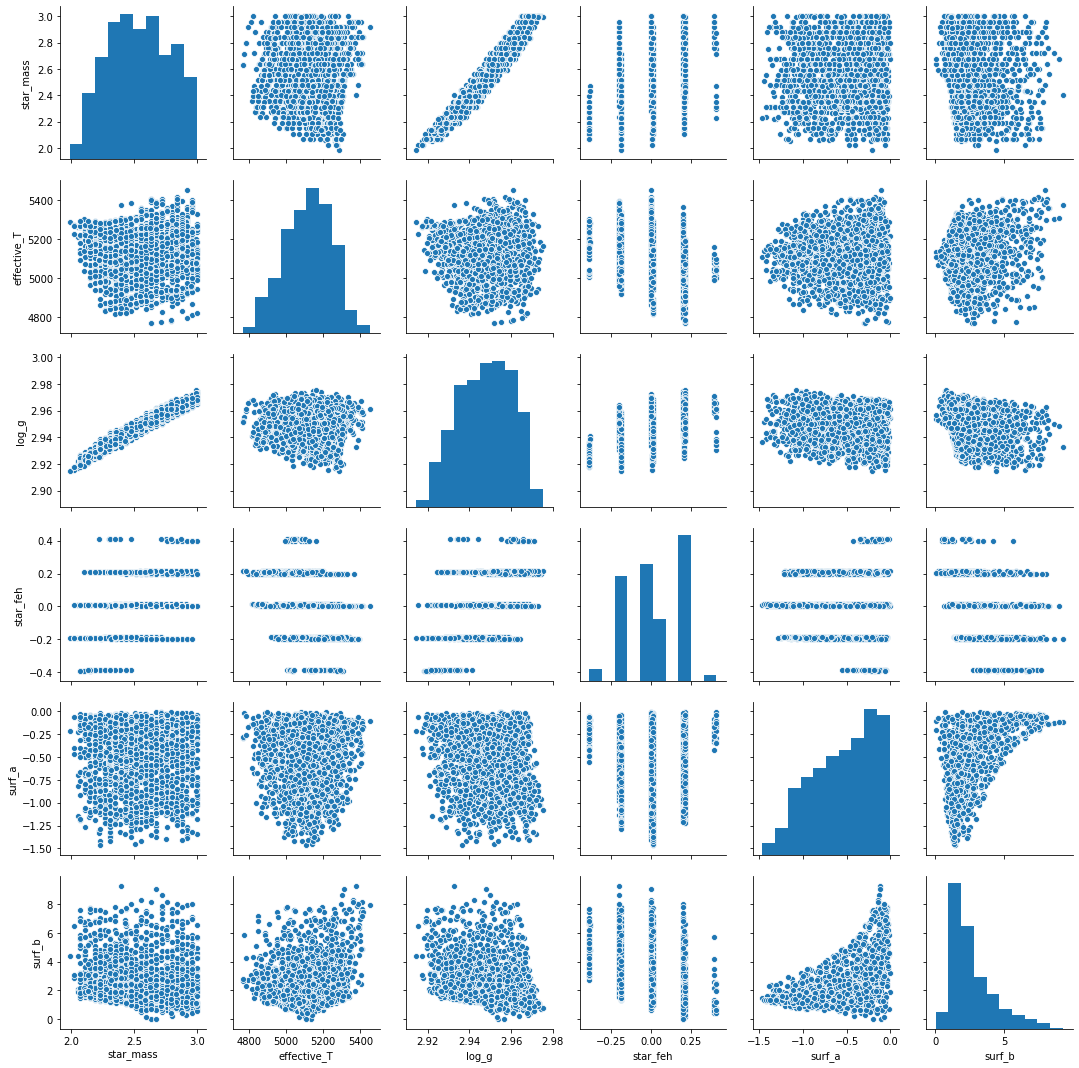

In [18]:
surface_set = starset_seismo.loc[( (starset_seismo['surf_a'] <= 9000.0) &
                                   (starset_seismo['surf_b'] <= 9000.0) &
                                   (starset_seismo['lk_new'] >= 0.01)
                                 )]

sns.pairplot(surface_set[['star_mass','effective_T','log_g','star_feh',
                            'surf_a', 'surf_b']])